In [2]:
from sklearn.linear_model import LassoCV
import pandas as pd
df= pd.read_csv('AvitoVoitures_normalise.csv')  # Remplacez par le chemin de votre fichier CSV

# Chargement des données
X = df.drop(columns=['Prix'])  # Caractéristiques
y = df['Prix']  # Cible

# Modèle Lasso avec sélection automatique
lasso = LassoCV()
lasso.fit(X, y)

# Affichage des caractéristiques retenues
selected_features = X.columns[lasso.coef_ != 0]
print("Caractéristiques sélectionnées avec Lasso :", selected_features)


Caractéristiques sélectionnées avec Lasso : Index(['Annee', 'Nombre de portes', 'Kilometrage', 'Puissance_fiscale',
       'Auto_manuel_Automatique', 'Auto_manuel_Manuelle', 'Carburant_essence',
       'Carburant_hybride', 'Marque_Audi', 'Marque_Autres',
       ...
       'Module_XC90', 'Module_XF', 'Module_Yaris', 'Module_i10', 'Module_i20',
       'Première main_Non', 'Etat_Correct', 'Etat_Excellent', 'Etat_Neuf',
       'Etat_Très bon'],
      dtype='object', length=198)


# Model régression linéaire

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Charger les données
data = pd.read_csv("AvitoVoitures_normalise.csv")
data.head()
# Définition de la cible (Prix)
y = data["Prix"]

# Définition des caractéristiques (features), en excluant la colonne "Prix"
X = data.drop(columns=["Prix"])

# 5️⃣ Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train),len(X_test),len(y_train), len(y_test))
print(len(X),len(y))

# 6️⃣ Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# 7️⃣ Prédictions et évaluation des performances
y_pred = model.predict(X_test)






10300 2575 10300 2575
12875 12875


In [4]:
y_test

11933    0.252747
11844    0.769231
8        0.208791
839      0.395604
2484     0.503297
           ...   
11102    0.197802
2464     0.268132
5886     0.108791
4653     0.967033
1805     0.208791
Name: Prix, Length: 2575, dtype: float64

In [5]:
y_pred

array([0.2865485 , 0.59595815, 0.27948356, ..., 0.20578197, 0.66703042,
       0.48068026], shape=(2575,))

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Prix réel (original) : [0.25274725 0.76923077 0.20879121 0.3956044  0.5032967  0.0989011
 0.23076923 0.0989011  1.         0.34725275]
Prix prédit (original) : [0.2865485  0.59595815 0.27948356 0.39828353 0.47102156 0.09616053
 0.24972948 0.03131927 0.60530751 0.38230637]


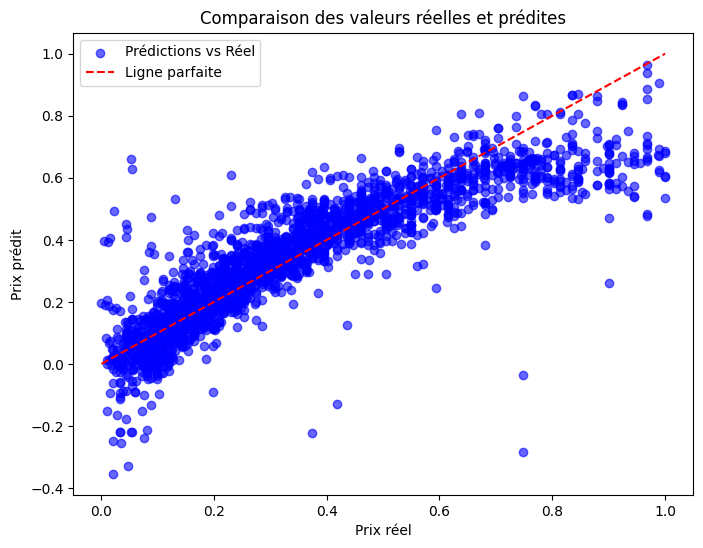

🔹 MAE : 0.07046021299227587
🔹 RMSE : 0.10528601995961799
🔹 R² Score : 0.7803426816038295


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assumons que nous avons déjà normalisé `Prix` avec MinMaxScaler
scaler = MinMaxScaler()
y_train_reshaped = y_train.values.reshape(-1, 1)  # Transformer en tableau 2D
scaler.fit(y_train_reshaped)  # Ajustement sur les données d'entraînement

# Prédictions normalisées
y_pred = model.predict(X_test)

# 🌟 **Inverse transformation pour récupérer les valeurs réelles**
y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

# 📌 **Affichage des premières valeurs**
print("Prix réel (original) :", y_test_original[:10].flatten())
print("Prix prédit (original) :", y_pred_original[:10].flatten())

# 📊 **Comparaison visuelle des prix réels et prédits**
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='blue', label="Prédictions vs Réel")
plt.plot([min(y_test_original), max(y_test_original)], 
         [min(y_test_original), max(y_test_original)], color="red", linestyle="--", label="Ligne parfaite")
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Comparaison des valeurs réelles et prédites")
plt.legend()
plt.show()

# 📌 **Évaluation du modèle**
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print(f"🔹 MAE : {mae}")  # Plus bas = meilleure précision
print(f"🔹 RMSE : {rmse}")  # Plus bas = moins d’erreur
print(f"🔹 R² Score : {r2}")  # Plus proche de 1 = meilleur modèle


MAE et RMSE donnent une idée des erreurs en unités réelles (euros).

MSE est utile pour voir l’impact des grandes erreurs, mais son interprétation est plus abstraite.

R² indique si ton modèle est globalement bon, mais il ne donne pas d’information sur les erreurs individuelles.

# Model RandomForest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 Charger ton dataset encodé et normalisé
data = pd.read_csv("AvitoVoitures_Normalise.csv")  # Mets ton fichier

# Définir les features et la cible
y = data["Prix"]
X = data.drop(columns=["Prix"])

# 🎯 **Division des données en train/test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nombre de lignes d'entraînement : {X_train.shape[0]}")
print(f"Nombre de lignes de test : {X_test.shape[0]}")

# 🚀 **Entraînement du modèle Random Forest**
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🎯 **Prédiction et évaluation**
y_pred = model.predict(X_test)

# 📌 **Évaluation du modèle**
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE : {mae} dhs")  # Plus bas = meilleure précision
print(f"🔹 RMSE : {rmse} dhs")  # Plus bas = moins d’erreur
print(f"🔹 R² Score : {r2}")  # Plus proche de 1 = meilleur modèle


Nombre de lignes d'entraînement : 10300
Nombre de lignes de test : 2575
🔹 MAE : 0.04268901712355702 dhs
🔹 RMSE : 0.07377272526945977 dhs
🔹 R² Score : 0.892156018222386


In [12]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 1.5 MB/s eta 0:01:38
   ---------------------------------------- 1.0/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 1.0/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 1.0/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 1.0/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 1.3/150.0 MB 780.2 kB/s eta 0:03:11
   ---------------------------------------- 1.6/150.0 MB 838.6 kB/s eta 0:02:57
   ---------------------------------------- 1.8/150.0 MB 898.8 kB/s eta 0:02:45
    --------------------------------------- 2.4/150.0 MB 1.0 MB/s eta 0:02:22
    --------------------------------------- 2.6/150.0 MB 1.1 MB/s eta 0:02:16



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Model Xgboost

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# 🔹 Charger ton dataset encodé et normalisé
data = pd.read_csv("AvitoVoitures_Normalise.csv")  # Mets ton fichier

# Définir les features et la cible
y = data["Prix"]
X = data.drop(columns=["Prix"])

# 🎯 **Division des données en train/test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nombre de lignes d'entraînement : {X_train.shape[0]}")
print(f"Nombre de lignes de test : {X_test.shape[0]}")

# 🚀 **Initialisation et entraînement du modèle XGBoost**
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 🎯 **Prédiction et évaluation**
y_pred = model.predict(X_test)

# 📌 **Évaluation du modèle**
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE : {mae} €")  # Plus bas = meilleure précision
print(f"🔹 RMSE : {rmse} €")  # Plus bas = moins d’erreur
print(f"🔹 R² Score : {r2}")  # Plus proche de 1 = meilleur modèle


Nombre de lignes d'entraînement : 10300
Nombre de lignes de test : 2575
🔹 MAE : 0.04493746888012853 €
🔹 RMSE : 0.07362632849022283 €
🔹 R² Score : 0.8925836111149084


# Gradient Boosting

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 🔹 Charger ton dataset encodé et normalisé
data = pd.read_csv("AvitoVoitures_Normalise.csv")  # Mets ton fichier

# Définir les features et la cible
y = data["Prix"]
X = data.drop(columns=["Prix"])

# 🎯 **Division des données en train/test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nombre de lignes d'entraînement : {X_train.shape[0]}")
print(f"Nombre de lignes de test : {X_test.shape[0]}")

# 🚀 **Initialisation et entraînement du modèle Gradient Boosting**
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 🎯 **Prédiction et évaluation**
y_pred = model.predict(X_test)

# 📌 **Évaluation du modèle**
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE : {mae} €")  # Plus bas = meilleure précision
print(f"🔹 RMSE : {rmse} €")  # Plus bas = moins d’erreur
print(f"🔹 R² Score : {r2}")  # Plus proche de 1 = meilleur modèle


Nombre de lignes d'entraînement : 10300
Nombre de lignes de test : 2575
🔹 MAE : 0.04431218766917756 €
🔹 RMSE : 0.07329270515646757 €
🔹 R² Score : 0.8935548783554049


In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 🔹 Charger ton dataset encodé et normalisé
data = pd.read_csv("AvitoVoitures_Normalise2.csv")  # Mets ton fichier

# Définir les features et la cible
y = data["Prix"]
X = data.drop(columns=["Prix"])

# 🎯 **Division des données en train/test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nombre de lignes d'entraînement : {X_train.shape[0]}")
print(f"Nombre de lignes de test : {X_test.shape[0]}")

# 🚀 **Initialisation et entraînement du modèle Gradient Boosting**
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 🎯 **Prédiction et évaluation**
y_pred = model.predict(X_test)

# 📌 **Évaluation du modèle**
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE : {mae} dhs")  # Plus bas = meilleure précision
print(f"🔹 RMSE : {rmse} dhs")  # Plus bas = moins d’erreur
print(f"🔹 R² Score : {r2}")  # Plus proche de 1 = meilleur modèle


Nombre de lignes d'entraînement : 10300
Nombre de lignes de test : 2575
🔹 MAE : 20193.02744290129 dhs
🔹 RMSE : 33354.998212988394 dhs
🔹 R² Score : 0.8935113527660421


In [5]:
import joblib
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Création des objets de transformation
encoder = OneHotEncoder(handle_unknown="ignore")
scaler = MinMaxScaler()

# Ajuster sur l'ensemble des données
df_cat = X.select_dtypes(include=['object'])
df_num = X.select_dtypes(include=['int64'])

encoder.fit(df_cat)  # Ajuster l'encoder
scaler.fit(df_num)   # Ajuster le scaler

# Sauvegarder l'encoder et le scaler
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Encoder et Scaler sauvegardés !")


✅ Encoder et Scaler sauvegardés !


In [3]:
import joblib

# 🚀 Sauvegarde du modèle entraîné
joblib.dump(model, "gradient_boosting_model.pkl")

print("✅ Modèle sauvegardé sous 'gradient_boosting_model.pkl'.")



✅ Modèle sauvegardé sous 'gradient_boosting_model.pkl'.


In [4]:
import joblib

# 🚀 Chargement du modèle sauvegardé
model_charge = joblib.load("gradient_boosting_model.pkl")

print("✅ Modèle chargé avec succès !")



✅ Modèle chargé avec succès !


In [7]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Charger le dataset normalisé ===
data = pd.read_csv("AvitoVoitures_Normalise2.csv")

# Séparer la cible et les features
y = data["Prix"]
X = data.drop(columns=["Prix"])

# Séparer les types de données
X_cat = X.select_dtypes(include=['object'])  # Variables catégoriques
X_num = X.select_dtypes(include=['int64'])   # Variables numériques

# === Appliquer One-Hot Encoding & Normalisation ===
encoder = OneHotEncoder(handle_unknown="ignore")
X_cat_encoded = encoder.fit_transform(X_cat).toarray()

scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Fusionner les transformations
X_transformed = np.concatenate((X_num_scaled, X_cat_encoded), axis=1)

# === Séparer en train/test ===
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# === Entraîner le modèle ===
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# === Évaluer le modèle ===
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE : {mae} €")
print(f"🔹 RMSE : {rmse} €")
print(f"🔹 R² Score : {r2}")

# === Sauvegarde du modèle, de l'encoder et du scaler ===
joblib.dump(model, "gradient_boosting_model.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Modèle, Encoder et Scaler sauvegardés !")


🔹 MAE : 40238.213649215584 €
🔹 RMSE : 57452.31532706432 €
🔹 R² Score : 0.6840658752974292
✅ Modèle, Encoder et Scaler sauvegardés !
